### 서울시에서 일어나는 범죄와 체감 안전도
: 강남 3구의 안전도가 얼마나 되는지 또한 서울시 전체의 안전도가 얼마나 되는지를 확인

In [102]:
import pandas as pd
import json
import numpy as np

In [2]:
crime_anal_police = pd.read_csv('../Data/crime_in_Seoul.csv', encoding='euc-kr')
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,중부서,2,2,3,2,105,65,"1,395",477,"1,355","1,170"
1,종로서,3,3,6,5,115,98,"1,070",413,"1,278","1,070"
2,남대문서,1,0,6,4,65,46,"1,153",382,869,794
3,서대문서,2,2,5,4,154,124,"1,812",738,"2,056","1,711"
4,혜화서,3,2,5,4,96,63,"1,114",424,"1,015",861


In [3]:
crime_anal_police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   관서명     31 non-null     object
 1   살인 발생   31 non-null     int64 
 2   살인 검거   31 non-null     int64 
 3   강도 발생   31 non-null     int64 
 4   강도 검거   31 non-null     int64 
 5   강간 발생   31 non-null     int64 
 6   강간 검거   31 non-null     int64 
 7   절도 발생   31 non-null     object
 8   절도 검거   31 non-null     object
 9   폭력 발생   31 non-null     object
 10  폭력 검거   31 non-null     object
dtypes: int64(6), object(5)
memory usage: 2.8+ KB


In [5]:
# 경찰서 위치 정보
police_address = pd.read_csv('../Data/SeoulPoliceAddress.csv')
police_address.head()

,경찰관서,전화번호,FAX,주소
0,서울중부경찰서,(02)2273-4400,(02)2275-3009,서울 중구 수표로 27
1,서울종로경찰서,(02)3701-4324,(02)3701-4223,서울 종로구 율곡로 46
2,서울남대문경찰서,(02)2096-8324,(02)2096-8337,서울 중구 한강대로 410
3,서울서대문경찰서,(02)335-8192,(02)335-8189,서울 서대문구 통일로 113
4,서울혜화경찰서,(02)762-4400,(02)3158-7133,서울 종로구 창경궁로 112-16


### crime_anal_police의 관서명을 police_address의 경찰관서와 일치 시키기
ex) 중부서 -> 서울정부경찰서

In [12]:
station_name = []
for name in crime_anal_police['관서명']:
    station_name.append('서울'+name[:-1]+'경찰서')

station_name

['서울중부경찰서',
 '서울종로경찰서',
 '서울남대문경찰서',
 '서울서대문경찰서',
 '서울혜화경찰서',
 '서울용산경찰서',
 '서울성북경찰서',
 '서울동대문경찰서',
 '서울마포경찰서',
 '서울영등포경찰서',
 '서울성동경찰서',
 '서울동작경찰서',
 '서울광진경찰서',
 '서울서부경찰서',
 '서울강북경찰서',
 '서울금천경찰서',
 '서울중랑경찰서',
 '서울강남경찰서',
 '서울관악경찰서',
 '서울강서경찰서',
 '서울강동경찰서',
 '서울종암경찰서',
 '서울구로경찰서',
 '서울서초경찰서',
 '서울양천경찰서',
 '서울송파경찰서',
 '서울노원경찰서',
 '서울방배경찰서',
 '서울은평경찰서',
 '서울도봉경찰서',
 '서울수서경찰서']

In [9]:
station_name = []
station_name = list('서울'+crime_anal_police['관서명'].str[:-1]+'경찰서')
station_name

['서울중부서경찰서',
 '서울종로서경찰서',
 '서울남대문서경찰서',
 '서울서대문서경찰서',
 '서울혜화서경찰서',
 '서울용산서경찰서',
 '서울성북서경찰서',
 '서울동대문서경찰서',
 '서울마포서경찰서',
 '서울영등포서경찰서',
 '서울성동서경찰서',
 '서울동작서경찰서',
 '서울광진서경찰서',
 '서울서부서경찰서',
 '서울강북서경찰서',
 '서울금천서경찰서',
 '서울중랑서경찰서',
 '서울강남서경찰서',
 '서울관악서경찰서',
 '서울강서서경찰서',
 '서울강동서경찰서',
 '서울종암서경찰서',
 '서울구로서경찰서',
 '서울서초서경찰서',
 '서울양천서경찰서',
 '서울송파서경찰서',
 '서울노원서경찰서',
 '서울방배서경찰서',
 '서울은평서경찰서',
 '서울도봉서경찰서']

### 경찰서의 위도 경도 수집하기

In [36]:
import urllib.request

client_id = "lpboio9b26"
client_secret = "BriQrPt1f95V0qSYAtBkMyR2nyuSXZZWZCiSltZG"
index = 1
lng = []
lat = []
for starbucksAddress in police_address['주소']:
    try:
        encText = urllib.parse.quote(starbucksAddress)
        url = "https://naveropenapi.apigw.ntruss.com/map-geocode/v2/geocode?query=" + encText # json 결과
        request = urllib.request.Request(url)
        request.add_header("X-NCP-APIGW-API-KEY-ID",client_id)
        request.add_header("X-NCP-APIGW-API-KEY",client_secret)
        response = urllib.request.urlopen(request)
        rescode = response.getcode()
        if(rescode==200):
            response_body = response.read()
            entext = response_body.decode('utf-8')
        else:
            print("Error Code:" + rescode)

        import json    
        data1 = json.loads(entext)
        lng.append(data1['addresses'][0]['x'])
        lat.append(data1['addresses'][0]['y'])
        print(index, ': 주소 -', starbucksAddress, ', 경도 -', data1['addresses'][0]['x'], ', 위도 -', data1['addresses'][0]['y'])
        index += 1
    except:
        print(index, ': Error')
        pass

print('Done')

1 : 주소 - 서울 중구 수표로 27 , 경도 - 126.9896139 , 위도 - 37.5635144
2 : 주소 - 서울 종로구 율곡로 46 , 경도 - 126.9849292 , 위도 - 37.5755322
3 : 주소 - 서울 중구 한강대로 410 , 경도 - 126.9735627 , 위도 - 37.5548186
4 : 주소 - 서울 서대문구 통일로 113 , 경도 - 126.9667851 , 위도 - 37.5649018
5 : 주소 - 서울 종로구 창경궁로 112-16 , 경도 - 126.9989318 , 위도 - 37.5718764
6 : 주소 - 서울 용산구 원효로89길 24 , 경도 - 126.9677732 , 위도 - 37.5412134
7 : 주소 - 서울 성북구 보문로 170 , 경도 - 127.0160835 , 위도 - 37.5899114
8 : 주소 - 서울 동대문구 약령시로21길 29 , 경도 - 127.0457643 , 위도 - 37.5851004
9 : 주소 - 서울 마포구 마포대로 183 , 경도 - 126.9539447 , 위도 - 37.5510175
10 : 주소 - 서울시 영등포구 국회대로 608 , 경도 - 126.9009426 , 위도 - 37.5258476
11 : 주소 - 서울 성동구 왕십리광장로 9 , 경도 - 127.0364909 , 위도 - 37.5618368
12 : 주소 - 서울 동작구 노량진로 148 , 경도 - 126.9428596 , 위도 - 37.5131459
13 : 주소 - 서울 광진구 자양로 167 , 경도 - 127.0838753 , 위도 - 37.5428366
14 : 주소 - 서울 은평구 통일로 757 , 경도 - 126.9279401 , 위도 - 37.6124468
15 : 주소 - 서울 강북구 오패산로 406 , 경도 - 127.0273396 , 위도 - 37.6374119
16 : 주소 - 서울 관악구 남부순환로 1435 , 경도 - 126.9099775 , 위도 - 37.4814192

In [49]:
police_address['위도'] = lat
police_address['경도'] = lng
len(police_address)

31

In [50]:
police_address

,경찰관서,전화번호,FAX,주소,위도,경도
0,서울중부경찰서,(02)2273-4400,(02)2275-3009,서울 중구 수표로 27,37.5635144,126.9896139
1,서울종로경찰서,(02)3701-4324,(02)3701-4223,서울 종로구 율곡로 46,37.5755322,126.9849292
2,서울남대문경찰서,(02)2096-8324,(02)2096-8337,서울 중구 한강대로 410,37.5548186,126.9735627
3,서울서대문경찰서,(02)335-8192,(02)335-8189,서울 서대문구 통일로 113,37.5649018,126.9667851
4,서울혜화경찰서,(02)762-4400,(02)3158-7133,서울 종로구 창경궁로 112-16,37.5718764,126.9989318
5,서울용산경찰서,(02)2198-0267,(02)2198-0325,서울 용산구 원효로89길 24,37.5412134,126.9677732
6,서울성북경찰서,(02)920-1324,(02)920-1661,서울 성북구 보문로 170,37.5899114,127.0160835
7,서울동대문경찰서,(02)3295-0110,(02)961-4849,서울 동대문구 약령시로21길 29,37.5851004,127.0457643
8,서울마포경찰서,(02)3149-6324,(02)3149-6327,서울 마포구 마포대로 183,37.5510175,126.9539447
9,서울영등포경찰서,(02)2118-9324,(02)2118-9461,서울시 영등포구 국회대로 608,37.5258476,126.9009426


In [54]:
crime_anal_police['구별'] = [region.split()[1] for region in police_address['주소']]
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구명,구별
0,중부서,2,2,3,2,105,65,"1,395",477,"1,355","1,170",중구,중구
1,종로서,3,3,6,5,115,98,"1,070",413,"1,278","1,070",종로구,종로구
2,남대문서,1,0,6,4,65,46,"1,153",382,869,794,중구,중구
3,서대문서,2,2,5,4,154,124,"1,812",738,"2,056","1,711",서대문구,서대문구
4,혜화서,3,2,5,4,96,63,"1,114",424,"1,015",861,종로구,종로구


In [55]:
len(crime_anal_police['구별'].unique())

23

> 서울시 구는 25개 구로 되어 있는데 23개 구만 보임  
> 서울시 구는 25개 구로 되어 있는데 경찰서 수가 31개

In [56]:
# 관서명과 구별 이름 확인
crime_anal_police.loc[:,['관서명','구별']]

,관서명,구별
0,중부서,중구
1,종로서,종로구
2,남대문서,중구
3,서대문서,서대문구
4,혜화서,종로구
5,용산서,용산구
6,성북서,성북구
7,동대문서,동대문구
8,마포서,마포구
9,영등포서,영등포구


In [62]:
# DataSet을 보면 금천서가 관악구로 편성되어 있는데 금천서는 금천구로 편성
crime_anal_police.loc[crime_anal_police['관서명'] == '금천서',['구별']] = '금천구'
crime_anal_police[crime_anal_police['관서명'] == '금천서']

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구명,구별
15,금천서,3,4,6,6,151,122,"1,567",888,"2,054","1,776",관악구,금천구


In [65]:
# 강서서가 양천구로 되어 있는데 강서구로 편성
crime_anal_police.loc[crime_anal_police['관서명'] == '강서서',['구별']] = '강서구'
crime_anal_police[crime_anal_police['관서명'] == '강서서']

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구명,구별
19,강서서,7,8,13,13,262,191,"2,096","1,260","3,207","2,718",양천구,강서구


In [66]:
len(crime_anal_police['구별'].unique())

25

In [67]:
crime_anal_police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   관서명     31 non-null     object
 1   살인 발생   31 non-null     int64 
 2   살인 검거   31 non-null     int64 
 3   강도 발생   31 non-null     int64 
 4   강도 검거   31 non-null     int64 
 5   강간 발생   31 non-null     int64 
 6   강간 검거   31 non-null     int64 
 7   절도 발생   31 non-null     object
 8   절도 검거   31 non-null     object
 9   폭력 발생   31 non-null     object
 10  폭력 검거   31 non-null     object
 11  구명      31 non-null     object
 12  구별      31 non-null     object
dtypes: int64(6), object(7)
memory usage: 3.3+ KB


In [69]:
# 절도 발생, 절도 검거, 폭력 발생, 폭력 검거를 정수 타입으로 변환
crime_anal_police['절도 발생'] = crime_anal_police['절도 발생'].str.replace(',','').astype(int)
crime_anal_police['절도 검거'] = crime_anal_police['절도 검거'].str.replace(',','').astype(int)
crime_anal_police['폭력 발생'] = crime_anal_police['폭력 발생'].str.replace(',','').astype(int)
crime_anal_police['폭력 검거'] = crime_anal_police['폭력 검거'].str.replace(',','').astype(int)
crime_anal_police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   관서명     31 non-null     object
 1   살인 발생   31 non-null     int64 
 2   살인 검거   31 non-null     int64 
 3   강도 발생   31 non-null     int64 
 4   강도 검거   31 non-null     int64 
 5   강간 발생   31 non-null     int64 
 6   강간 검거   31 non-null     int64 
 7   절도 발생   31 non-null     int64 
 8   절도 검거   31 non-null     int64 
 9   폭력 발생   31 non-null     int64 
 10  폭력 검거   31 non-null     int64 
 11  구명      31 non-null     object
 12  구별      31 non-null     object
dtypes: int64(10), object(3)
memory usage: 3.3+ KB


In [80]:
crime_anal = crime_anal_police.pivot_table(index='구별', aggfunc=sum)
crime_anal

/var/folders/qw/q8mqqb4n5cb6nv7qrd0tm17r0000gn/T/ipykernel_87837/367277933.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  crime_anal = crime_anal_police.pivot_table(index='구별', aggfunc=sum)


,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생
구별,,,,,,,,,,
강남구,349,449,18,21,10,13,1650,3850,3705,4284
강동구,123,156,8,6,3,4,789,2366,2248,2712
강북구,126,153,13,14,8,7,618,1434,2348,2649
강서구,191,262,13,13,8,7,1260,2096,2718,3207
관악구,221,320,14,12,8,9,827,2706,2642,3298
광진구,220,240,26,14,4,4,1277,3026,2180,2625
구로구,164,281,11,15,6,8,889,2335,2432,3007
금천구,122,151,6,6,4,3,888,1567,1776,2054
노원구,121,197,7,7,10,10,801,2193,2329,2723


In [81]:
# 각 범죄별 검거율 구하기
crime_anal['강간검거율'] = crime_anal['강간 검거'] / crime_anal['강간 발생'] * 100
crime_anal['강도검거율'] = crime_anal['강도 검거'] / crime_anal['강도 발생'] * 100
crime_anal['살인검거율'] = crime_anal['살인 검거'] / crime_anal['살인 발생'] * 100
crime_anal['절도검거율'] = crime_anal['절도 검거'] / crime_anal['절도 발생'] * 100
crime_anal['폭력검거율'] = crime_anal['폭력 검거'] / crime_anal['폭력 발생'] * 100
crime_anal

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,,,,,,
강남구,349,449,18,21,10,13,1650,3850,3705,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,123,156,8,6,3,4,789,2366,2248,2712,78.846154,133.333333,75.000000,33.347422,82.890855
강북구,126,153,13,14,8,7,618,1434,2348,2649,82.352941,92.857143,114.285714,43.096234,88.637222
강서구,191,262,13,13,8,7,1260,2096,2718,3207,72.900763,100.000000,114.285714,60.114504,84.752105
관악구,221,320,14,12,8,9,827,2706,2642,3298,69.062500,116.666667,88.888889,30.561715,80.109157
광진구,220,240,26,14,4,4,1277,3026,2180,2625,91.666667,185.714286,100.000000,42.200925,83.047619
구로구,164,281,11,15,6,8,889,2335,2432,3007,58.362989,73.333333,75.000000,38.072805,80.877951
금천구,122,151,6,6,4,3,888,1567,1776,2054,80.794702,100.000000,133.333333,56.668794,86.465433
노원구,121,197,7,7,10,10,801,2193,2329,2723,61.421320,100.000000,100.000000,36.525308,85.530665


In [82]:
# 검거 건수는 제거
del crime_anal['강간 검거']
del crime_anal['강도 검거']
del crime_anal['살인 검거']
del crime_anal['절도 검거']
del crime_anal['폭력 검거']
crime_anal.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,133.333333,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,114.285714,43.096234,88.637222
강서구,262,13,7,2096,3207,72.900763,100.000000,114.285714,60.114504,84.752105
관악구,320,12,9,2706,3298,69.062500,116.666667,88.888889,30.561715,80.109157


In [83]:
# 검거율이 100이 넘는 경우에는 100으로 변경한다.
crime_anal[crime_anal.iloc[:,5:] > 100] = 100
crime_anal

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
강서구,262,13,7,2096,3207,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157
광진구,240,14,4,3026,2625,91.666667,100.000000,100.000000,42.200925,83.047619
구로구,281,15,8,2335,3007,58.362989,73.333333,75.000000,38.072805,80.877951
금천구,151,6,3,1567,2054,80.794702,100.000000,100.000000,56.668794,86.465433
노원구,197,7,10,2193,2723,61.421320,100.000000,100.000000,36.525308,85.530665


In [84]:
# column 이름 변경
crime_anal.rename(
    columns= {
        '강간 발생' : '강간',
        '강도 발생' : '강도',
        '살인 발생' : '살인',
        '절도 발생' : '절도',
        '폭력 발생' : '폭력',
    }, inplace= True
)
crime_anal

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
강서구,262,13,7,2096,3207,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157
광진구,240,14,4,3026,2625,91.666667,100.000000,100.000000,42.200925,83.047619
구로구,281,15,8,2335,3007,58.362989,73.333333,75.000000,38.072805,80.877951
금천구,151,6,3,1567,2054,80.794702,100.000000,100.000000,56.668794,86.465433
노원구,197,7,10,2193,2723,61.421320,100.000000,100.000000,36.525308,85.530665


### 데이터의 정규화(Normalization)
- 강도와 살인은 2자리수 이나 절도와 폭력은 4자리 입니다.
- 각각의 범죄 발생 건수를 비슷한 범위에 놓고 비교하는 것이 편리.
- 각 항목의 값을 최대 1로 계산한다(비중)

In [88]:
# !pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 18.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.9/28.9 MB 13.8 MB/s eta 0:00:0000:0100:01


In [89]:
# 머신러닝 모듈
# sklearn의 preprocessing기능을 사용하면 최대값과 최소값을 비교하면서 정규화가 진행
from sklearn import preprocessing

In [90]:
# 정규화를 진행할 컬럼 설정
col = ['강간', '강도', '살인', '절도', '폭력']

In [91]:
x = crime_anal[col].values
x

array([[ 449,   21,   13, 3850, 4284],
       [ 156,    6,    4, 2366, 2712],
       [ 153,   14,    7, 1434, 2649],
       [ 262,   13,    7, 2096, 3207],
       [ 320,   12,    9, 2706, 3298],
       [ 240,   14,    4, 3026, 2625],
       [ 281,   15,    8, 2335, 3007],
       [ 151,    6,    3, 1567, 2054],
       [ 197,    7,   10, 2193, 2723],
       [ 102,    9,    3, 1063, 1487],
       [ 173,   13,    5, 1981, 2548],
       [ 285,    9,    5, 1865, 1910],
       [ 294,   14,    8, 2555, 2983],
       [ 154,    5,    2, 1812, 2056],
       [ 393,    9,    8, 2635, 2399],
       [ 126,    9,    4, 1607, 1612],
       [ 150,    5,    5, 1785, 2209],
       [ 220,   13,   11, 3239, 3295],
       [ 120,    6,    3, 1890, 2509],
       [ 295,   22,   14, 2964, 3572],
       [ 194,   14,    5, 1557, 2050],
       [ 166,    9,    3, 1914, 2653],
       [ 211,   11,    6, 2184, 2293],
       [ 170,    9,    3, 2548, 2224],
       [ 187,   11,   13, 2135, 2847]])

In [92]:
# 최대값과 최소값 가져오기
min_max_scaler = preprocessing.MinMaxScaler()

In [93]:
x_scaled = min_max_scaler.fit_transform(x.astype(float))
x_scaled

array([[1.        , 0.94117647, 0.91666667, 1.        , 1.        ],
       [0.1556196 , 0.05882353, 0.16666667, 0.46752781, 0.43796925],
       [0.14697406, 0.52941176, 0.41666667, 0.13311805, 0.41544512],
       [0.4610951 , 0.47058824, 0.41666667, 0.37064944, 0.61494458],
       [0.62824207, 0.41176471, 0.58333333, 0.58952278, 0.64747944],
       [0.39769452, 0.52941176, 0.16666667, 0.70434159, 0.4068645 ],
       [0.51585014, 0.58823529, 0.5       , 0.45640474, 0.5434394 ],
       [0.14121037, 0.05882353, 0.08333333, 0.18083961, 0.2027172 ],
       [0.27377522, 0.11764706, 0.66666667, 0.40545389, 0.44190204],
       [0.        , 0.23529412, 0.08333333, 0.        , 0.        ],
       [0.20461095, 0.47058824, 0.25      , 0.32938644, 0.379335  ],
       [0.52737752, 0.23529412, 0.25      , 0.28776462, 0.15123346],
       [0.55331412, 0.52941176, 0.5       , 0.53534266, 0.53485878],
       [0.14985591, 0.        , 0.        , 0.26874776, 0.20343225],
       [0.83861671, 0.23529412, 0.

In [94]:
# 정규화된 범죄건수가 있는 데이터프레임 생성
crime_anal_norm = pd.DataFrame(x_scaled, columns=col, index=crime_anal.index)
crime_anal_norm

,강간,강도,살인,절도,폭력
구별,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000
강동구,0.155620,0.058824,0.166667,0.467528,0.437969
강북구,0.146974,0.529412,0.416667,0.133118,0.415445
강서구,0.461095,0.470588,0.416667,0.370649,0.614945
관악구,0.628242,0.411765,0.583333,0.589523,0.647479
광진구,0.397695,0.529412,0.166667,0.704342,0.406864
구로구,0.515850,0.588235,0.500000,0.456405,0.543439
금천구,0.141210,0.058824,0.083333,0.180840,0.202717
노원구,0.273775,0.117647,0.666667,0.405454,0.441902


In [96]:
col2 = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']
crime_anal_norm[col2] = crime_anal[col2]
crime_anal_norm

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157
광진구,0.397695,0.529412,0.166667,0.704342,0.406864,91.666667,100.000000,100.000000,42.200925,83.047619
구로구,0.515850,0.588235,0.500000,0.456405,0.543439,58.362989,73.333333,75.000000,38.072805,80.877951
금천구,0.141210,0.058824,0.083333,0.180840,0.202717,80.794702,100.000000,100.000000,56.668794,86.465433
노원구,0.273775,0.117647,0.666667,0.405454,0.441902,61.421320,100.000000,100.000000,36.525308,85.530665


---
### CCTV 데이터와 합치기
: 구별 CCTV수와 인구수를 가져와서 범죄율과 얼마나 상관성이 있는지 확인

In [99]:
result_CCTV = pd.read_csv('../Data/cctv_result.csv', index_col='구별')
result_CCTV

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,인구대비cctv비율,오차
구별,,,,,,,,,,
강남구,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812,0.949449,2570.380612
송파구,1586,62.833676,680883,674095,6788,89539,0.996941,13.150424,0.232933,1442.540920
관악구,3985,99.150425,516662,499374,17288,76664,3.346095,14.838328,0.771297,1430.274035
도봉구,858,66.601942,333495,331238,2257,60023,0.676772,17.998171,0.257275,1168.247488
강서구,1617,77.887789,595703,589302,6401,85992,1.074529,14.435381,0.271444,1165.777237
중랑구,1068,22.477064,400678,395619,5059,66764,1.262610,16.662757,0.266548,1152.085731
구로구,3227,72.106667,438308,405837,32471,67432,7.408261,15.384615,0.736240,898.343155
성동구,2679,114.148681,307193,299042,8151,44728,2.653381,14.560228,0.872090,728.639767
강북구,1265,83.068017,316750,312985,3765,61660,1.188635,19.466456,0.399369,712.934353


In [101]:
crime_anal_norm[['인구수','CCTV']] = result_CCTV[['인구수','소계']]
crime_anal_norm

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV
구별,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,549898,5221
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,457042,1879
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,316750,1265
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,595703,1617
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,516662,3985
광진구,0.397695,0.529412,0.166667,0.704342,0.406864,91.666667,100.000000,100.000000,42.200925,83.047619,365990,1581
구로구,0.515850,0.588235,0.500000,0.456405,0.543439,58.362989,73.333333,75.000000,38.072805,80.877951,438308,3227
금천구,0.141210,0.058824,0.083333,0.180840,0.202717,80.794702,100.000000,100.000000,56.668794,86.465433,251370,1634
노원구,0.273775,0.117647,0.666667,0.405454,0.441902,61.421320,100.000000,100.000000,36.525308,85.530665,535495,1906


In [103]:
# 범죄 발생건수를 합하여 범죄 컬럼 생성
col = ['강간', '강도', '살인', '절도', '폭력']
crime_anal_norm['범죄'] = np.sum(crime_anal_norm[col], axis=1)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄
구별,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,549898,5221,4.857843
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,457042,1879,1.286607
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,316750,1265,1.641616
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,595703,1617,2.333944
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,516662,3985,2.860342


In [104]:
# 범죄 검거율을 합하여 검거 컬럼 생성
col = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']
crime_anal_norm['검거'] = np.sum(crime_anal_norm[col], axis=1)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,549898,5221,4.857843,369.707384
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,457042,1879,1.286607,370.084431
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,316750,1265,1.641616,406.943540
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,595703,1617,2.333944,417.767372
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,516662,3985,2.860342,368.622261


---
### Seaborn을 활용한 시각화

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

In [107]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

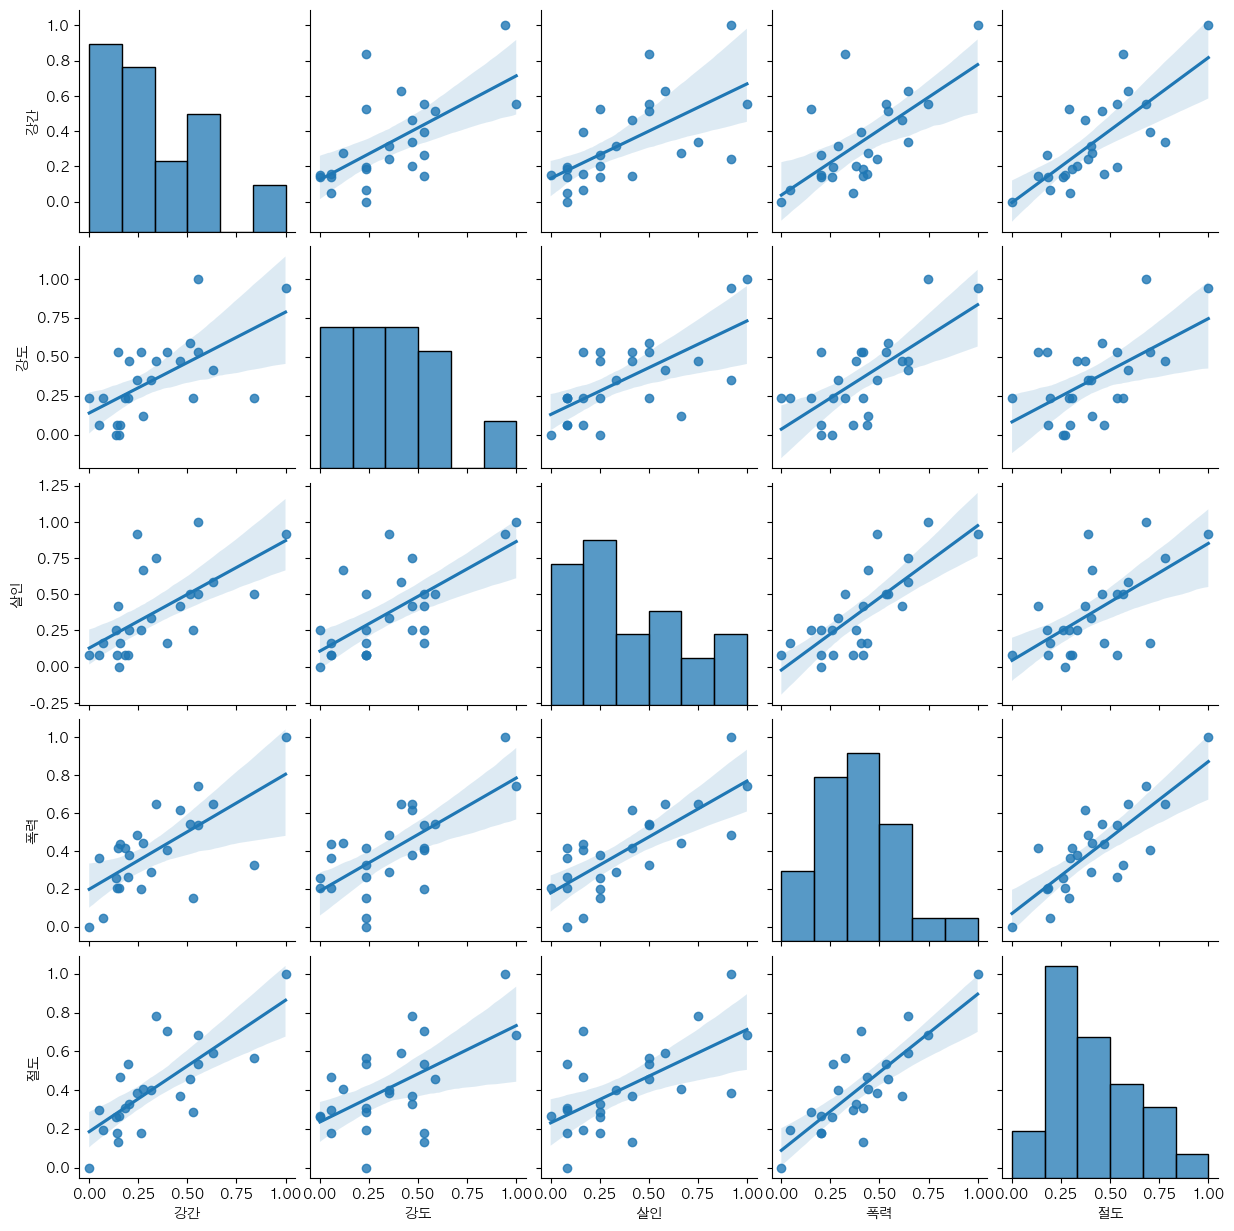

In [111]:
# 강간, 강도, 살인, 폭력, 절도 건수에 대한 상관관계 시각화
sns.pairplot(
    crime_anal_norm,
    vars = ['강간', '강도', '살인', '폭력', '절도'],
    kind = 'reg'
)
plt.show()

### CCTV와 살인 강도에 대한 그래프

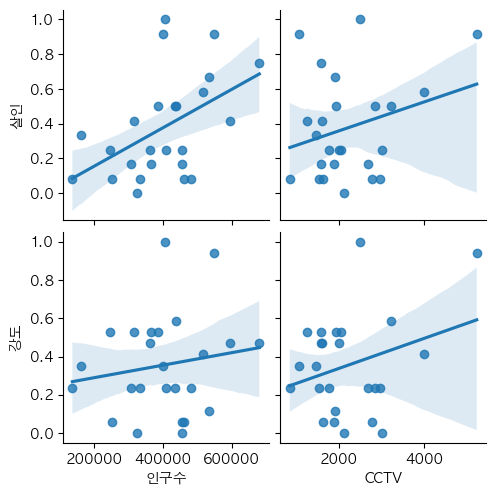

In [112]:
sns.pairplot(
    crime_anal_norm,
    x_vars=['인구수','CCTV'],
    y_vars=['살인','강도'],
    kind='reg'
)
plt.show()

### 인구수, CCTV와 살인검거율, 폭력검거율

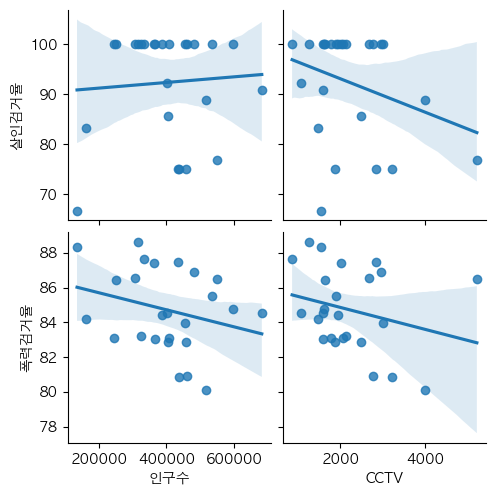

In [113]:
sns.pairplot(
    crime_anal_norm,
    x_vars=['인구수','CCTV'],
    y_vars=['살인검거율','폭력검거율'],
    kind='reg'
)
plt.show()

### heatmap을 이용한 전체 검거율 확인

In [116]:
# 검거 최대값 가져오기
crime_anal_norm['검거'] = crime_anal_norm['검거'] / 100

# 검거율을 기준으로 정렬하기
crime_anal_norm_sort = crime_anal_norm.sort_values(by='검거', ascending=False)
crime_anal_norm_sort.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
도봉구,0.000000,0.235294,0.083333,0.000000,0.000000,100.000000,100.0,100.0,44.967074,87.626093,333495,858,0.318627,4.325932
금천구,0.141210,0.058824,0.083333,0.180840,0.202717,80.794702,100.0,100.0,56.668794,86.465433,251370,1634,0.666924,4.239289
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.0,100.0,60.114504,84.752105,595703,1617,2.333944,4.177674
광진구,0.397695,0.529412,0.166667,0.704342,0.406864,91.666667,100.0,100.0,42.200925,83.047619,365990,1581,2.204979,4.169152
동대문구,0.204611,0.470588,0.250000,0.329386,0.379335,84.393064,100.0,100.0,41.090358,87.401884,362793,2003,1.633921,4.128853


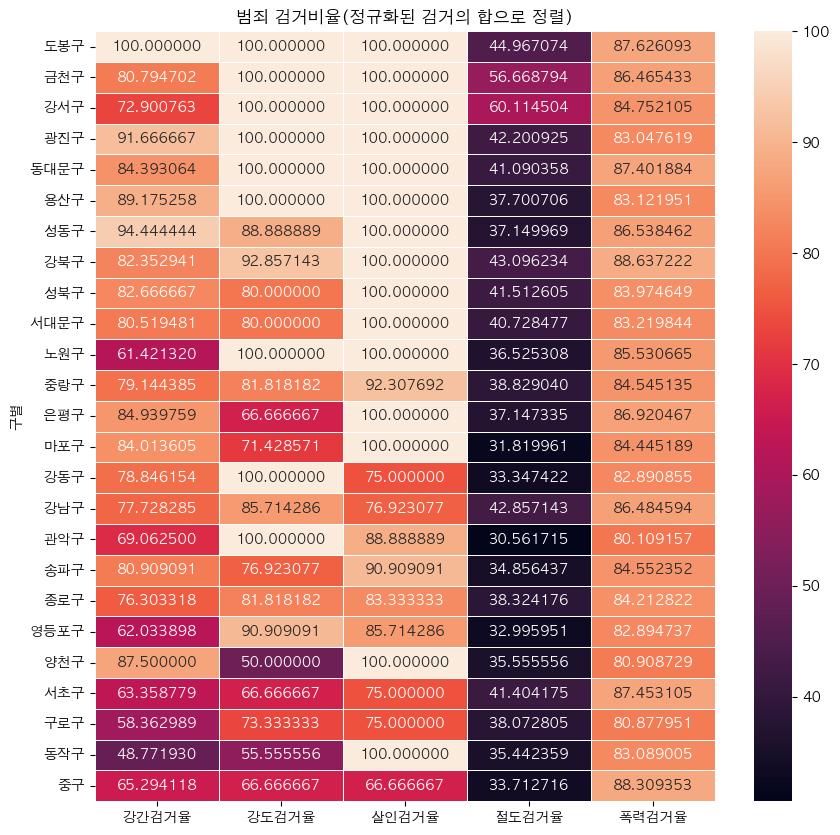

In [118]:
target_col = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']

plt.figure(figsize=(10,10))
sns.heatmap(
    crime_anal_norm_sort[target_col],
    annot = True,
    fmt='f',
    linewidths=0.5
)

plt.title('범죄 검거비율(정규화된 검거의 합으로 정렬)')
plt.show()

### 지도 출력

In [119]:
import json
import folium

In [120]:
geo_path = '../Data/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [123]:
map = folium.Map(
    location=[37.55, 126.98],
    zoom_start=10.5,
    tiles='Stamen Toner'
)

folium.Choropleth(
    geo_data=geo_str,
    data=crime_anal_norm_sort,
    columns=[crime_anal_norm_sort.index, '살인'],
    fill_color='PuRd',
    key_on='feature.id'
).add_to(map)

map

In [124]:
map = folium.Map(
    location=[37.55, 126.98],
    zoom_start=10.5,
    tiles='Stamen Toner'
)

folium.Choropleth(
    geo_data=geo_str,
    data=crime_anal_norm_sort,
    columns=[crime_anal_norm_sort.index, '강간'],
    fill_color='PuRd',
    key_on='feature.id'
).add_to(map)

map

In [125]:
map = folium.Map(
    location=[37.55, 126.98],
    zoom_start=10.5,
    tiles='Stamen Toner'
)

folium.Choropleth(
    geo_data=geo_str,
    data=crime_anal_norm_sort,
    columns=[crime_anal_norm_sort.index, '범죄'],
    fill_color='PuRd',
    key_on='feature.id'
).add_to(map)

map

In [137]:
map = folium.Map(
    location=[37.55, 126.98],
    zoom_start=10.5,
    tiles='Stamen Toner'
)

folium.Choropleth(
    geo_data=geo_str,
    data=crime_anal_norm,
    columns=[crime_anal_norm.index, '10만명당범죄율'],
    fill_color='PuRd',
    key_on='feature.id'
).add_to(map)

map

In [151]:
map = folium.Map(
    location=[37.55, 126.98],
    zoom_start=10.5,
    tiles='Stamen Toner'
)

folium.Choropleth(
    geo_data=geo_str,
    data=crime_anal_norm_sort,
    columns=[crime_anal_norm_sort.index, '범죄'],
    fill_color='PuRd',
    key_on='feature.id'
).add_to(map)

for name, lat, lng, crime in zip(police_address.경찰관서 ,police_address.위도, police_address.경도, crime_anal_norm.범죄):
    folium.Marker([lat, lng], popup=name, icon=folium.Icon(icon = 'star', color = 'blue')).add_to(map)
    folium.CircleMarker([lat, lng], popup=name,
        radius=crime * 10, # 원의 반지름
        color='brown',#원둘레 색상
        fill=True,
        fill_color='coral',#원을 채우는 색
        fill_opacity= 0.7#투명도
    ).add_to(map)
map

In [ ]:
pd.merge()

In [159]:
crime_anal_police

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구명,구별
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구,중구
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구,종로구
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구,중구
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구,서대문구
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구,종로구
5,용산서,5,5,14,14,194,173,1557,587,2050,1704,용산구,용산구
6,성북서,2,2,2,1,86,71,953,409,1194,1015,성북구,성북구
7,동대문서,5,5,13,13,173,146,1981,814,2548,2227,동대문구,동대문구
8,마포서,8,8,14,10,294,247,2555,813,2983,2519,마포구,마포구
9,영등포서,14,12,22,20,295,183,2964,978,3572,2961,영등포구,영등포구


In [160]:
police_address

,경찰관서,전화번호,FAX,주소,위도,경도
0,서울중부경찰서,(02)2273-4400,(02)2275-3009,서울 중구 수표로 27,37.5635144,126.9896139
1,서울종로경찰서,(02)3701-4324,(02)3701-4223,서울 종로구 율곡로 46,37.5755322,126.9849292
2,서울남대문경찰서,(02)2096-8324,(02)2096-8337,서울 중구 한강대로 410,37.5548186,126.9735627
3,서울서대문경찰서,(02)335-8192,(02)335-8189,서울 서대문구 통일로 113,37.5649018,126.9667851
4,서울혜화경찰서,(02)762-4400,(02)3158-7133,서울 종로구 창경궁로 112-16,37.5718764,126.9989318
5,서울용산경찰서,(02)2198-0267,(02)2198-0325,서울 용산구 원효로89길 24,37.5412134,126.9677732
6,서울성북경찰서,(02)920-1324,(02)920-1661,서울 성북구 보문로 170,37.5899114,127.0160835
7,서울동대문경찰서,(02)3295-0110,(02)961-4849,서울 동대문구 약령시로21길 29,37.5851004,127.0457643
8,서울마포경찰서,(02)3149-6324,(02)3149-6327,서울 마포구 마포대로 183,37.5510175,126.9539447
9,서울영등포경찰서,(02)2118-9324,(02)2118-9461,서울시 영등포구 국회대로 608,37.5258476,126.9009426
